In [1]:
import os
from keras import backend as K
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Força o uso da CPU

2024-10-10 14:06:49.038282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-10 14:06:49.052240: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-10 14:06:49.056308: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-10 14:06:49.066170: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-10 14:06:49.935969: W tensorflow/compiler/tf2

In [2]:
from Modelos import GeradorClassificador, Gerador
from segmentandoDatasets import segmentando_datasets
from Preprocessamento import preprocessamento

In [3]:
segmentando_datasets(10000,10000,10000)

Criação dos Modelos a partir de um gerador, todos os modelos estão com a entrada de imagem (64,64,3)

Found 6000 validated image filenames.
Found 2000 validated image filenames.
Found 2000 validated image filenames.


I0000 00:00:1728580011.326115   10892 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728580011.360469   10892 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728580011.360644   10892 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728580011.361668   10892 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Encoder output shape: (None, 5632)
Decoder input shape: (None, 5632)
Decoder output shape: (None, 64, 64, 3)


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 5632)           │       194,457 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 64, 64, 3)      │    31,989,212 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,183,669 (122.77 MB)

 Trainable params: 32,183,669 (122.77 MB)

 Non-trainable params: 0 (0.00 B)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 18)     │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 18)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 203)    │        33,089 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 203)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 88)     │       160,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 88)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5632)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194,457 (759.60 KB)

 Trainable params: 194,457 (759.60 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 5632)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5632)           │    31,725,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 88)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 88)       │        69,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 88)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 203)    │       160,979 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 203)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 18)     │        32,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 64, 64, 18)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 3)      │           489 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,989,212 (122.03 MB)

 Trainable params: 31,989,212 (122.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728580014.766659   10965 service.cc:146] XLA service 0x7b31f8010450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728580014.766678   10965 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2024-10-10 14:06:54.839732: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-10 14:06:55.064433: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  5/188 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0565

I0000 00:00:1728580018.809886   10965 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 87ms/step - loss: 0.0352 - val_loss: 0.0090
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0074 - val_loss: 0.0058
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0035 - val_loss: 0.0043
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0025 - val_loss: 0.0025
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

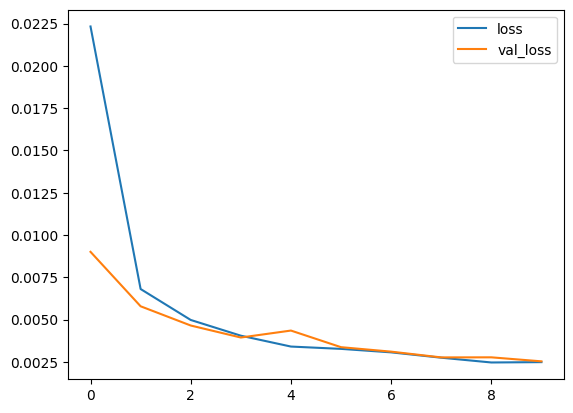

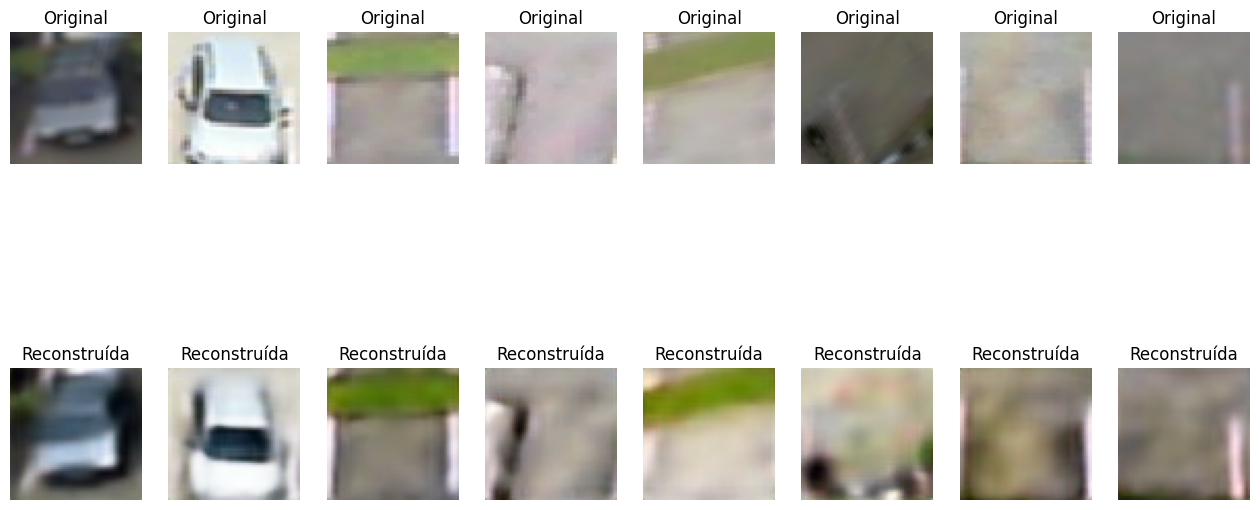

In [4]:
treinoPUC, validacaoPUC, testePUC, treino_dfPUC, validacao_dfPUC, teste_df = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_PUC.csv")
PUC = Gerador(input_shape=(64,64,3),min_layers=1, max_layers=6)
PUC.Dataset(treinoPUC, validacaoPUC, testePUC)

ModeloPUC = PUC.construir_modelo()
PUC.compilar_modelo()
ModeloPUC.summary()
PUC.encoder.summary()
PUC.decoder.summary()
PUC.setNome("Modelo PUC - Teste")

PUC.treinar_autoencoder(epocas=10, salvar=True, batch_size=8)
del ModeloPUC

K.clear_session()

In [5]:
"""treinoUFPR04, validacaoUFPR04, testeUFPR04, treino_dfUFPR04, validacao_dfUFPR04, teste_dfUFPR04 = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_UFPR04.csv")
UFPR04 = Gerador(input_shape=(64,64,3), max_layers=4)
UFPR04.Dataset(treinoUFPR04, validacaoUFPR04, testeUFPR04)

ModeloUFPR04 = UFPR04.construir_modelo()
UFPR04.compilar_modelo()
ModeloUFPR04.summary()
UFPR04.encoder.summary()
UFPR04.decoder.summary()
UFPR04.setNome("Modelo UFPR04")

UFPR04.treinar_autoencoder(epocas=10, salvar=True, batch_size=8)
del ModeloUFPR04

K.clear_session()"""


'treinoUFPR04, validacaoUFPR04, testeUFPR04, treino_dfUFPR04, validacao_dfUFPR04, teste_dfUFPR04 = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_UFPR04.csv")\nUFPR04 = Gerador(input_shape=(64,64,3), max_layers=4)\nUFPR04.Dataset(treinoUFPR04, validacaoUFPR04, testeUFPR04)\n\nModeloUFPR04 = UFPR04.construir_modelo()\nUFPR04.compilar_modelo()\nModeloUFPR04.summary()\nUFPR04.encoder.summary()\nUFPR04.decoder.summary()\nUFPR04.setNome("Modelo UFPR04")\n\nUFPR04.treinar_autoencoder(epocas=10, salvar=True, batch_size=8)\ndel ModeloUFPR04\n\nK.clear_session()'

In [6]:
"""treinoUFPR05, validacaoUFPR05, testeUFPR05, treino_dfUFPR05, validacao_dfUFPR05, teste_dfUFPR05 = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_UFPR05.csv")
UFPR05 = Gerador(input_shape=(64,64,3), max_layers=4) 
UFPR05.Dataset(treinoUFPR05, validacaoUFPR05, testeUFPR05)

ModeloUFPR05 = UFPR05.construir_modelo()
UFPR05.compilar_modelo()
ModeloUFPR05.summary()
UFPR05.encoder.summary()
UFPR05.decoder.summary()

UFPR05.setNome("Modelo UFPR05")

UFPR05.treinar_autoencoder(epocas=10, salvar=True, batch_size=8)
del ModeloUFPR05

K.clear_session()"""


'treinoUFPR05, validacaoUFPR05, testeUFPR05, treino_dfUFPR05, validacao_dfUFPR05, teste_dfUFPR05 = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_UFPR05.csv")\nUFPR05 = Gerador(input_shape=(64,64,3), max_layers=4) \nUFPR05.Dataset(treinoUFPR05, validacaoUFPR05, testeUFPR05)\n\nModeloUFPR05 = UFPR05.construir_modelo()\nUFPR05.compilar_modelo()\nModeloUFPR05.summary()\nUFPR05.encoder.summary()\nUFPR05.decoder.summary()\n\nUFPR05.setNome("Modelo UFPR05")\n\nUFPR05.treinar_autoencoder(epocas=10, salvar=True, batch_size=8)\ndel ModeloUFPR05\n\nK.clear_session()'

Forma como posso carregar os modelos

In [7]:
PUC = Gerador()
UFPR04 = Gerador()
UFPR05 = Gerador()

PUC.setNome('Modelo PUC')
UFPR04.setNome('Modelo UFPR04')
UFPR05.setNome('Modelo UFPR05')

AutoencoderPUC = PUC.carrega_modelo('Modelos_keras/Autoencoders_Gerados/Modelo PUC.keras', 'weights_finais/Autoencoders_Gerados/Modelo PUC.weights.h5')
AutoencoderUFPR04 = UFPR04.carrega_modelo('Modelos_keras/Autoencoders_Gerados/Modelo UFPR04.keras', 'weights_finais/Autoencoders_Gerados/Modelo UFPR04.weights.h5')
AutoencoderUFPR05 = UFPR05.carrega_modelo('Modelos_keras/Autoencoders_Gerados/Modelo UFPR05.keras', 'weights_finais/Autoencoders_Gerados/Modelo UFPR05.weights.h5')

In [8]:
segmentando_datasets(10000,10000,10000)

DataFrame do local PUC salvo como: Datasets_csv/df_PUC.csv
DataFrame do local PUC:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
1  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
2  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
3  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
4  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied


DataFrame do local UFPR04 salvo como: Datasets_csv/df_UFPR04.csv
DataFrame do local UFPR04:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
1  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
2  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
3  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
4  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied


DataFrame do local UFPR05 salvo como: Datasets_csv/df_UFPR05.csv


(                                         caminho_imagem    classe
 0     /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
 1     /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
 2     /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
 3     /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
 4     /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
 ...                                                 ...       ...
 9995  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
 9996  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
 9997  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
 9998  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
 9999  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
 
 [10000 rows x 2 columns],
                                          caminho_imagem    classe
 0     /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
 1     /home/lucas/Downloads/PKLo

Gero meus classificadores a partir dos Encoders

In [9]:
"""classificadorPUC = GeradorClassificador(PUC.encoder, PUC.getPesos(), nomeModelo='PUC')
treinoPUC, validacaoPUC, testePUC, treino_dfPUC, validacao_dfPUC, teste_dfPUC = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_PUC.csv", autoencoder=False)
classificadorPUC.Dataset(treinoPUC, validacaoPUC, testePUC)
classificadorPUC.treinamento(salvar=True)
classificadorPUC.predicao(teste_dfPUC)"""

'classificadorPUC = GeradorClassificador(PUC.encoder, PUC.getPesos(), nomeModelo=\'PUC\')\ntreinoPUC, validacaoPUC, testePUC, treino_dfPUC, validacao_dfPUC, teste_dfPUC = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_PUC.csv", autoencoder=False)\nclassificadorPUC.Dataset(treinoPUC, validacaoPUC, testePUC)\nclassificadorPUC.treinamento(salvar=True)\nclassificadorPUC.predicao(teste_dfPUC)'

In [10]:
"""classificadorUFPR04 = GeradorClassificador(UFPR04.encoder, UFPR04.getPesos(), 'UFPR04')
treinoUFPR04, validacaoUFPR04, testeUFPR04, treino_dfUFPR04, validacao_dfUFPR04, teste_dfUFPR04 = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_UFPR04.csv", autoencoder=False)
classificadorUFPR04.Dataset(treinoUFPR04, validacaoUFPR04, testeUFPR04)
classificadorUFPR04.treinamento(salvar=True)
classificadorUFPR04.predicao(teste_dfUFPR04)"""

'classificadorUFPR04 = GeradorClassificador(UFPR04.encoder, UFPR04.getPesos(), \'UFPR04\')\ntreinoUFPR04, validacaoUFPR04, testeUFPR04, treino_dfUFPR04, validacao_dfUFPR04, teste_dfUFPR04 = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_UFPR04.csv", autoencoder=False)\nclassificadorUFPR04.Dataset(treinoUFPR04, validacaoUFPR04, testeUFPR04)\nclassificadorUFPR04.treinamento(salvar=True)\nclassificadorUFPR04.predicao(teste_dfUFPR04)'

In [11]:
"""classificadorUFPR05 = GeradorClassificador(UFPR05.encoder, UFPR05.getPesos(), 'UFPR05')
treinoUFPR05, validacaoUFPR05, testeUFPR05, treino_dfUFPR05, validacao_dfUFPR05, teste_dfUFPR05 = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_UFPR05.csv", autoencoder=False)
classificadorUFPR05.Dataset(treinoUFPR05, validacaoUFPR05, testeUFPR05)
classificadorUFPR05.treinamento(salvar=True)
classificadorUFPR05.predicao(teste_dfUFPR05)"""

'classificadorUFPR05 = GeradorClassificador(UFPR05.encoder, UFPR05.getPesos(), \'UFPR05\')\ntreinoUFPR05, validacaoUFPR05, testeUFPR05, treino_dfUFPR05, validacao_dfUFPR05, teste_dfUFPR05 = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_UFPR05.csv", autoencoder=False)\nclassificadorUFPR05.Dataset(treinoUFPR05, validacaoUFPR05, testeUFPR05)\nclassificadorUFPR05.treinamento(salvar=True)\nclassificadorUFPR05.predicao(teste_dfUFPR05)'

Como carregar os classificadores existentes

Pesos carregados com sucesso
Found 6000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:591: UserWarning: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense, built=True>:

Layer 'dense' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=dense, built=True>, <Dense name=dense_1, built=True>]
  warnings.warn(msg)
/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `us

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step


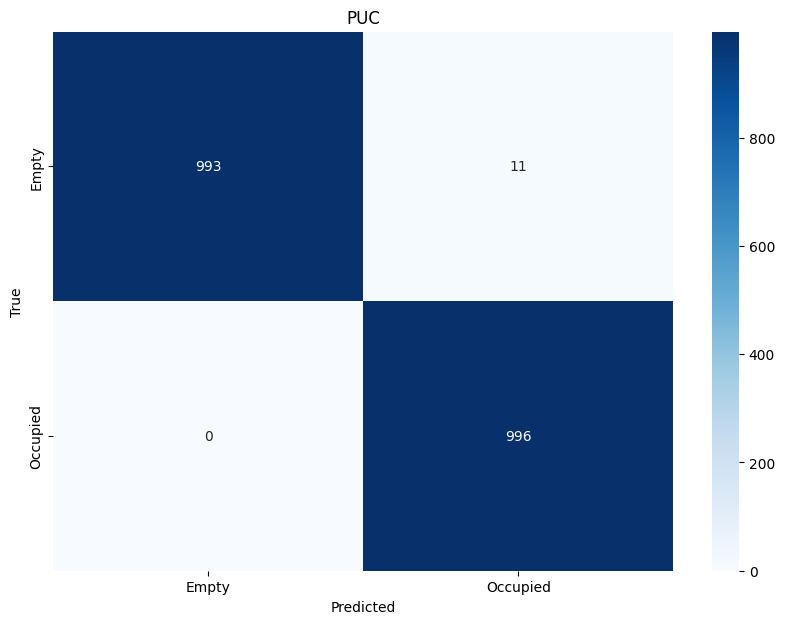

array([0, 1, 1, ..., 1, 0, 0])

In [12]:
classificadorPUC = GeradorClassificador(PUC.encoder, PUC.getPesos(), 'PUC')
treinoPUC, validacaoPUC, testePUC, treino_dfPUC, validacao_dfPUC, teste_dfPUC = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_PUC.csv", autoencoder=False)
classificadorPUC.carrega_modelo("Modelos_keras/Classificador_Gerados/Classificador-PUC.keras", "weights_finais/Classificador_Gerados/Classificador-PUC.weights.h5")
classificadorPUC.Dataset(treinoPUC, validacaoPUC, testePUC)
classificadorPUC.predicao(teste_dfPUC)

Pesos carregados com sucesso
Found 6000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:591: UserWarning: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense_2, built=True>:

Layer 'dense_2' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=dense_2, built=True>, <Dense name=dense_3, built=True>]
  warnings.warn(msg)
/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step


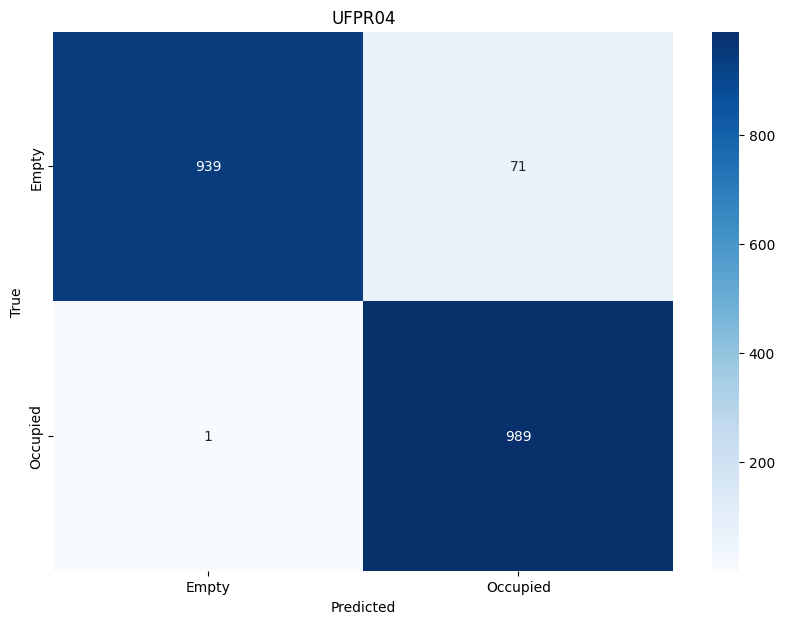

array([1, 1, 0, ..., 0, 1, 1])

In [13]:
classificadorUFPR04 = GeradorClassificador(UFPR04.encoder, UFPR04.getPesos(), 'UFPR04')
treinoUFPR04, validacaoUFPR04, testeUFPR04, treino_dfUFPR04, validacao_dfUFPR04, teste_dfUFPR04 = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_UFPR04.csv", autoencoder=False)
classificadorUFPR04.carrega_modelo("Modelos_keras/Classificador_Gerados/Classificador-UFPR04.keras", "weights_finais/Classificador_Gerados/Classificador-UFPR04.weights.h5")
classificadorUFPR04.Dataset(treinoUFPR04, validacaoUFPR04, testeUFPR04)
classificadorUFPR04.predicao(teste_dfUFPR04)

Pesos carregados com sucesso
Found 6000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:591: UserWarning: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense_4, built=True>:

Layer 'dense_4' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=dense_4, built=True>, <Dense name=dense_5, built=True>]
  warnings.warn(msg)
/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step


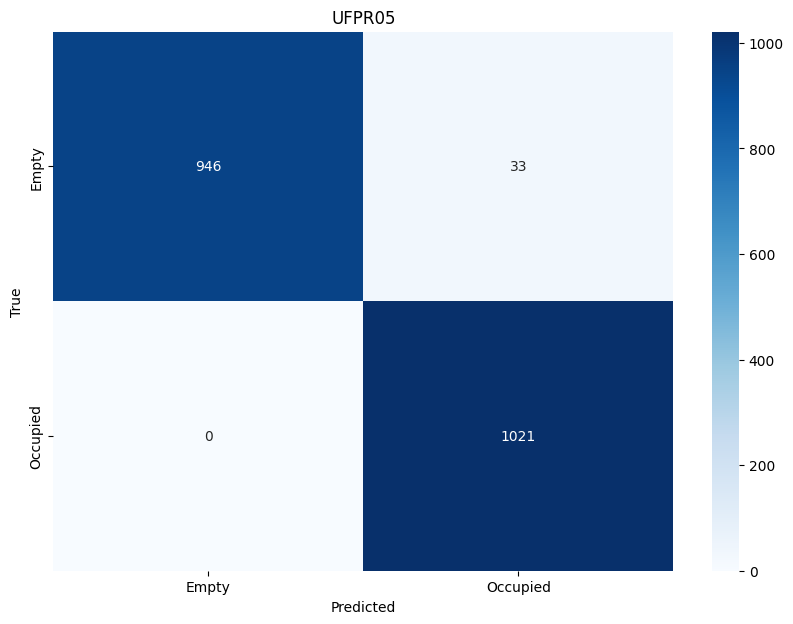

array([0, 1, 1, ..., 1, 0, 0])

In [14]:
classificadorUFPR05 = GeradorClassificador(UFPR05.encoder, UFPR05.getPesos(), 'UFPR05')
treinoUFPR05, validacaoUFPR05, testeUFPR05, treino_dfUFPR05, validacao_dfUFPR05, teste_dfUFPR05 = preprocessamento(input_shape = (64,64), caminho="Datasets_csv/df_UFPR05.csv", autoencoder=False)
classificadorUFPR05.carrega_modelo("Modelos_keras/Classificador_Gerados/Classificador-UFPR05.keras", "weights_finais/Classificador_Gerados/Classificador-UFPR05.weights.h5")
classificadorUFPR05.Dataset(treinoUFPR05, validacaoUFPR05, testeUFPR05)
classificadorUFPR05.predicao(teste_dfUFPR05)

In [15]:
"""import numpy as np

def x_y(gerador):
    x_data = []
    y_data = []

    for _ in range(len(gerador)):
        x, y = next(gerador)
        x_data.append(x)
        y_data.append(y)

    x_data = np.concatenate(x_data, axis=0)
    y_data = np.concatenate(y_data, axis=0)

    return x_data, y_data"""

Criando um classificador keras, o modelo que o sklearn aceita


In [16]:
"""from scikeras.wrappers import KerasClassifier

classificador_PUC = KerasClassifier(model=classificadorPUC)
classificador_UFPR04 = KerasClassifier(model=classificadorUFPR04)
classificador_UFPR05 = KerasClassifier(model=classificadorUFPR05)"""

Ensemble Bagging 

In [17]:
"""from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

x_treino, y_treino = x_y(treinoPUC)

bagging = BaggingClassifier(estimator=SVC(), n_estimators=10) 
#teria que mudar meu input do classificador para 12288 para poder colocar ele como estimator 

x_treino_flattened = x_treino.reshape(x_treino.shape[0], -1)  
#achata as imagens para (n_samples, height * width * channels)

bagging.fit(x_treino_flattened, y_treino)
#bagging aceita apenas entradas apenas em duas dimensões 
"""

BaggingClassifier(estimator=SVC())

In [ ]:
"""from sklearn.metrics import accuracy_score
from visualizacao import plot_confusion_matrix

x_teste, y_teste = x_y(testePUC)

x_teste_flattened = x_teste.reshape(x_teste.shape[0], -1)

y_pred_bg=bagging.predict(x_teste_flattened)

print("Acuracia: ",accuracy_score(y_teste,y_pred_bg))
plot_confusion_matrix(y_teste, y_pred_bg)
"""

Ensemble Voting

In [46]:
"""from sklearn.ensemble import VotingClassifier

classificadores = [("PUC", classificador_PUC), ("UFPR04",classificador_UFPR04), ("UFPR05", classificador_UFPR05)]

vc = VotingClassifier(estimators=classificadores, voting='hard', n_jobs=1)"""

In [ ]:
#vc.fit(x_treino, y_treino)

In [ ]:
"""y_pred_vc = vc.predict(x_teste)

plot_confusion_matrix(y_teste, y_pred_vc)"""

Ensemble AdaBoost

In [ ]:
"""from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Use AdaBoostClassifier
ada_class = AdaBoostClassifier(estimator=classificador_PUC, n_estimators=50, random_state=42)
ada_class.fit(x_treino_flattened, y_treino)
y_pred_class_ada = ada_class.predict(x_teste_flattened)
print("Classification Accuracy Score:", accuracy_score(y_teste, y_pred_class_ada))
plot_confusion_matrix(y_teste, y_pred_class_ada)
"""